# Time series generator -- show different "types" or "classes" of times series

In [1]:
import os
import sys
import numpy as np
from scipy import signal as scipysig
from matplotlib import pyplot as plt

ROOT = os.path.dirname(os.getcwd())
sys.path.insert(0, os.path.join(ROOT, "ts_generator"))

import TS_generator as TSgen
import TS_plotting as TSplot

# General workflow:
## 1) Import time series classes from yaml files

In [3]:
PATH_classes = os.path.join(ROOT, 'TS_types')
filename = os.path.join(PATH_classes, 'TS_type_test001.yaml')

TSC_01 = TSgen.load_TS_class(filename)

Test_1
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time.

n_channels: 10
n_timepoints: 400


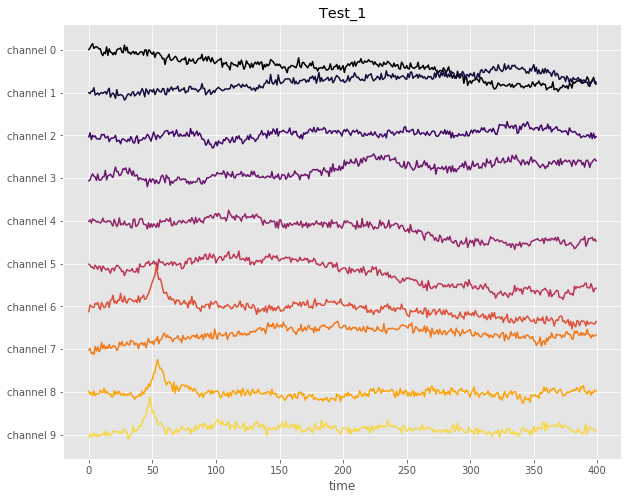

In [4]:
X = TSgen.generate_TS(TSC_01,
                    random_seed = None)

TSplot.plot_TS(X, TSC_01)

Test_2
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time (later time).

n_channels: 10
n_timepoints: 400


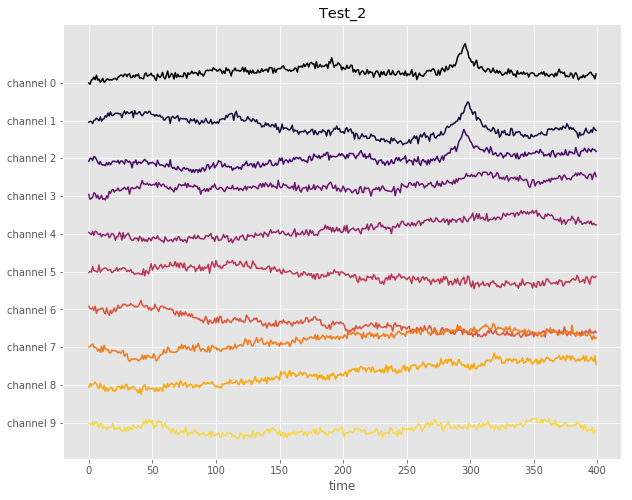

In [5]:
filename = os.path.join(PATH_classes, 'TS_type_test002.yaml')
TSC_02 = TSgen.load_TS_class(filename)
X = TSgen.generate_TS(TSC_02, random_seed = None)

TSplot.plot_TS(X, TSC_02)

Test_3
Part of a test dataset to test classifiers. Contains three gaussian signals at different positions.

n_channels: 10
n_timepoints: 400


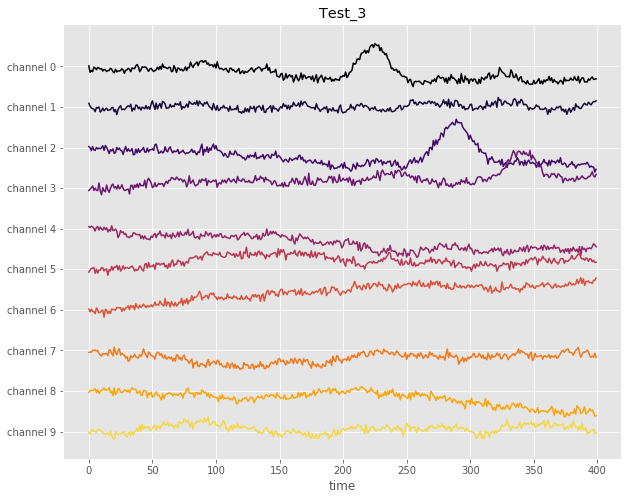

In [6]:
filename = os.path.join(PATH_classes, 'TS_type_test003.yaml')
TSC_03 = TSgen.load_TS_class(filename)
X = TSgen.generate_TS(TSC_03, random_seed = None)

TSplot.plot_TS(X, TSC_03)

## Generate entire data set
+ ``generate_dataset`` will create a dataset of ``instances_per_class`` instances for every "class"/"type" given as a yaml file.

In [7]:
TS_classes = []
for filename in ['TS_type_test000.yaml', 'TS_type_test001.yaml', 'TS_type_test002.yaml', 'TS_type_test003.yaml']:
    TS_classes.append(os.path.join(PATH_classes, filename))

In [10]:
X_data, y_data = TSgen.generate_dataset(TS_classes, instances_per_class=200, random_seed=None)

Test_0
Part of a test dataset to test classifiers. This one is the no-signal baseline only containing noise.

n_channels: 10
n_timepoints: 400
Test_1
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time.

n_channels: 10
n_timepoints: 400
Test_2
Part of a test dataset to test classifiers. Contains three peaks roughly at the same time (later time).

n_channels: 10
n_timepoints: 400
Test_3
Part of a test dataset to test classifiers. Contains three gaussian signals at different positions.

n_channels: 10
n_timepoints: 400


### Show dimension of generated data

In [11]:
X_data.shape

(800, 10, 400)

### Show found labels

In [12]:
list(set(y_data))

['Test_3', 'Test_2', 'Test_1', 'Test_0']

In [13]:
y_data[:10]

['Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0',
 'Test_0']